### Post HMC analysis 

In [4]:
# preamble and imports 
import arviz as az
import os, glob
from cmdstanpy import from_csv 
from matplotlib.colors import to_rgb, to_hex
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.io import savemat


In [5]:
model_names = ['AlphaSM', 'AlphaSME', 'AlphaSMP', 'AlphaSMEP','BayesSM', 'BayesSME', 'BayesSMP', 'BayesSMEP']
groups      = ['HC', 'PreTreat', 'PostTreat', 'PostTreat_Liv', 'PostTreat_Dun']

params = {
    'AlphaSM':   ['alpha','beta'],
    'AlphaSME':  ['alpha','beta','phi'],
    'AlphaSMP':  ['alpha','beta','persev'],
    'AlphaSMEP': ['alpha','beta','phi','persev'],
    'BayesSM':   ['beta'],
    'BayesSME':  ['beta','phi'],
    'BayesSMP':  ['beta','persev'],
    'BayesSMEP': ['beta','phi','persev'],
}

param_list = ["alpha","beta","phi","persev"]  # columns

colors = sns.color_palette("deep", 5)
palette = dict(zip(groups, sns.color_palette('deep', n_colors=len(groups)).as_hex()))


In [11]:
def load_fits_as_az(root_dir, groups, models):
    idatas = {}
    for group in groups:
        idatas[group] = {}    
        for model in models:
            outdir = os.path.join(root_dir, group, model)
            print(outdir)
            csvs = sorted(glob.glob(os.path.join(outdir, '*.csv')))
        
            fit = from_csv(csvs)
            idatas[group][model] = az.from_cmdstanpy(fit)
            
    return idatas

def quick_check(idatas_dict):
    """Quick summary of dimensions."""
    for dataset_name, models_dict in idatas_dict.items():
        print(f"\n{dataset_name}:")
        for model_name, idata in models_dict.items():
            dims = idata.posterior.dims
            print(f"  {model_name}: {dims['chain']} chains × {dims['draw']} draws")

In [12]:
path_to_fits = 'Fits'
idatas_groups = load_fits_as_az(path_to_fits, groups, model_names)

Fits/HC/AlphaSM
Fits/HC/AlphaSME
Fits/HC/AlphaSMP
Fits/HC/AlphaSMEP
Fits/HC/BayesSM
Fits/HC/BayesSME
Fits/HC/BayesSMP
Fits/HC/BayesSMEP
Fits/PreTreat/AlphaSM
Fits/PreTreat/AlphaSME


12:24:01 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.1%)
	Chain 2 had 59 divergent transitions (2.4%)
	Chain 3 had 4 divergent transitions (0.2%)
	Chain 4 had 4 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
12:24:01 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 378 divergent transitions (15.1%)
	Chain 2 had 10 divergent transitions (0.4%)
	Chain 3 had 27 divergent transitions (1.1%)
	Chain 4 had 14 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PreTreat/AlphaSMP


12:24:01 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 5 divergent transitions (0.2%)
	Chain 3 had 17 divergent transitions (0.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PreTreat/AlphaSMEP
Fits/PreTreat/BayesSM
Fits/PreTreat/BayesSME
Fits/PreTreat/BayesSMP
Fits/PreTreat/BayesSMEP
Fits/PostTreat/AlphaSM
Fits/PostTreat/AlphaSME


12:24:03 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 2 divergent transitions (0.1%)
	Chain 3 had 6 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PostTreat/AlphaSMP


12:24:03 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PostTreat/AlphaSMEP
Fits/PostTreat/BayesSM
Fits/PostTreat/BayesSME
Fits/PostTreat/BayesSMP
Fits/PostTreat/BayesSMEP


12:24:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 114 divergent transitions (4.6%)
	Chain 2 had 61 divergent transitions (2.4%)
	Chain 3 had 39 divergent transitions (1.6%)
	Chain 4 had 362 divergent transitions (14.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
12:24:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 97 divergent transitions (3.9%)
	Chain 2 had 140 divergent transitions (5.6%)
	Chain 3 had 200 divergent transitions (8.0%)
	Chain 4 had 35 divergent transitions (1.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PostTreat_Liv/AlphaSM
Fits/PostTreat_Liv/AlphaSME
Fits/PostTreat_Liv/AlphaSMP


12:24:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 206 divergent transitions (8.2%)
	Chain 2 had 53 divergent transitions (2.1%)
	Chain 3 had 180 divergent transitions (7.2%)
	Chain 4 had 219 divergent transitions (8.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
12:24:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 145 divergent transitions (5.8%)
	Chain 2 had 92 divergent transitions (3.7%)
	Chain 3 had 89 divergent transitions (3.6%)
	Chain 4 had 171 divergent transitions (6.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PostTreat_Liv/AlphaSMEP
Fits/PostTreat_Liv/BayesSM
Fits/PostTreat_Liv/BayesSME


12:24:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 2 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PostTreat_Liv/BayesSMP
Fits/PostTreat_Liv/BayesSMEP
Fits/PostTreat_Dun/AlphaSM
Fits/PostTreat_Dun/AlphaSME
Fits/PostTreat_Dun/AlphaSMP


12:24:05 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fits/PostTreat_Dun/AlphaSMEP
Fits/PostTreat_Dun/BayesSM
Fits/PostTreat_Dun/BayesSME
Fits/PostTreat_Dun/BayesSMP
Fits/PostTreat_Dun/BayesSMEP


In [13]:
# dataset checks prior to matlab exports 
print(idatas_groups.keys())
print(idatas_groups['HC'].keys())
idata = idatas_groups['HC']['BayesSMEP'] 
for v in idata.posterior.data_vars:
    print(v, "dims:", idata.posterior[v].dims, "shape:", idata.posterior[v].shape)

dict_keys(['HC', 'PreTreat', 'PostTreat', 'PostTreat_Liv', 'PostTreat_Dun'])
dict_keys(['AlphaSM', 'AlphaSME', 'AlphaSMP', 'AlphaSMEP', 'BayesSM', 'BayesSME', 'BayesSMP', 'BayesSMEP'])
beta_mu dims: ('chain', 'draw') shape: (4, 2500)
phi_mu dims: ('chain', 'draw') shape: (4, 2500)
persev_mu dims: ('chain', 'draw') shape: (4, 2500)
beta_sd dims: ('chain', 'draw') shape: (4, 2500)
phi_sd dims: ('chain', 'draw') shape: (4, 2500)
persev_sd dims: ('chain', 'draw') shape: (4, 2500)
beta dims: ('chain', 'draw', 'beta_dim_0') shape: (4, 2500, 32)
phi dims: ('chain', 'draw', 'phi_dim_0') shape: (4, 2500, 32)
persev dims: ('chain', 'draw', 'persev_dim_0') shape: (4, 2500, 32)


In [14]:
# check mat structure works
# idata = idatas_groups['HC']['BayesSMEP']

# beta   = idata.posterior['beta'  ].stack(sample=('chain','draw')).values  # (10000, 32)
# phi    = idata.posterior['phi'   ].stack(sample=('chain','draw')).values  # (10000, 32)
# persev = idata.posterior['persev'].stack(sample=('chain','draw')).values  # (10000, 32)

# savemat('per_subject_draws.mat',
#         {'beta': beta, 'phi': phi, 'persev': persev},
#         do_compression=True, long_field_names=True)
all_fits = {}
for group in groups:
    all_fits[group] = {}
    for model in model_names:
        idata = idatas_groups[group][model]
        all_fits[group][model] = {}
        for param in params[model]:
            all_fits[group][model][param] = idata.posterior[param].stack(sample=('chain','draw')).values

savemat('per_subject_draws.mat', all_fits, do_compression=True, long_field_names=True)

In [16]:
# helper for param limits for plots 

group_mean_samples = {}
for model in model_names:
    for group in groups:
        idata = idatas_groups.get(group, {}).get(model)
        for param in param_list:
            if param not in idata.posterior.data_vars:
                continue
            param_posterior = idata.posterior[param]
            subj_dims = [dim for dim in param_posterior.dims if dim not in ['chain','draw']]
            samples = param_posterior.mean(dim=subj_dims).stack(sample=('chain','draw')).values  # 
            samples = samples[np.isfinite(samples)]
            if samples.size:
                group_mean_samples[(group, model, param)] = samples
                
parameter_axis_limits = {}
for parameter_name in param_list:
    vals = [
        group_mean_samples[(group_name, model_name, parameter_name)]
        for model_name in model_names
        for group_name in groups
        if (group_name, model_name, parameter_name) in group_mean_samples
    ]
    v = np.concatenate(vals)
    lo, hi = np.quantile(v, [0.005, 0.995])
    pad = 0.05 * (hi - lo) if hi > lo else 0.05
    parameter_axis_limits[parameter_name] = (lo - pad, hi + pad)


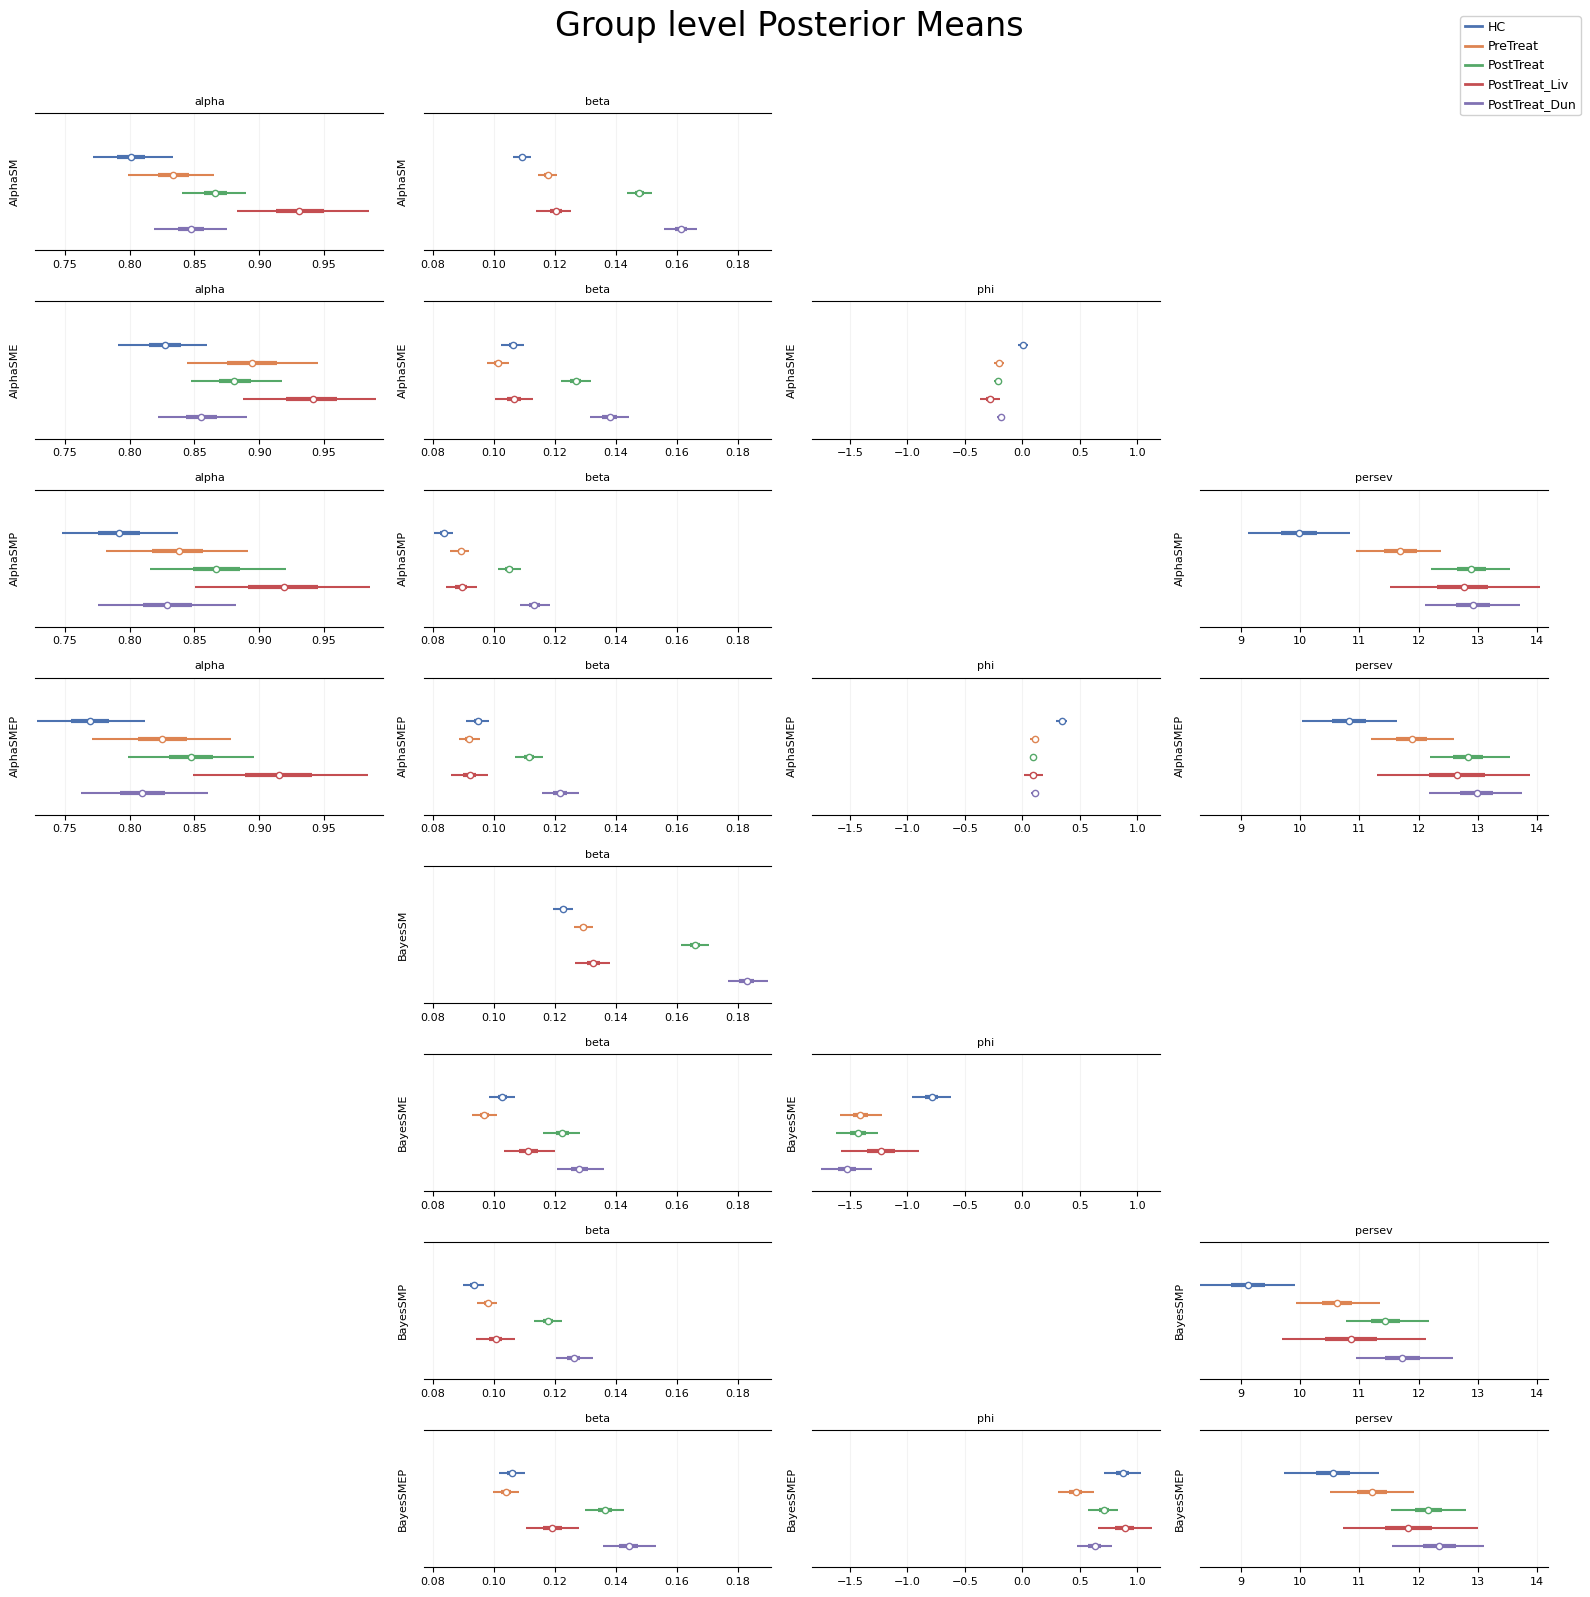

In [17]:
n_rows, n_cols = len(model_names), len(param_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), squeeze=False)

for i, model in enumerate(model_names):
    
    for j, param in enumerate(param_list):
        ax = axes[i, j]
        
        if param not in idatas_groups['HC'][model].posterior.data_vars:
            ax.axis('off')
            continue

        group_mean_posteriors = [
            az.from_dict(
                posterior={
                    param: (
                        idatas_groups[group][model]
                        .posterior[param]
                        .mean(dim=[d for d in idatas_groups[group][model].posterior[param].dims if d not in ['chain','draw']])
                        .stack(sample=('chain','draw'))
                        .values[None, :]
                    )
                }
            )
            for group in groups
        ]

        az.plot_forest(
                group_mean_posteriors,
                var_names=[param],
                model_names=groups,
                colors=[palette[group] for group in groups],
                combined=True,
                ax=ax,
        )
        ax.set_title("")
        ax.grid(axis="x", alpha=0.15)
        ax.tick_params(labelsize=8)
        
        ax.set_yticklabels([])
        ax.set_title(param, fontsize=8)
        ax.set_ylabel(model, fontsize=8)
        if param in parameter_axis_limits:
            ax.set_xlim(*parameter_axis_limits[param])
        
plt.tight_layout(rect=(0.0, 0.08, 1.0, 1.0))

from matplotlib.lines import Line2D

for ax in axes.ravel():
    lg = ax.get_legend()
    if lg is not None:
        lg.remove()

# figure-level legend (top-right of the whole figure)
handles = [Line2D([0],[0], lw=2, color=palette[g]) for g in groups]
labels  = groups
fig.legend(
    handles, labels,
    loc='upper right', bbox_to_anchor=(0.995, 0.995),
    frameon=True, framealpha=0.9,
    borderpad=0.35, handlelength=1.4, handletextpad=0.45,
    prop={'size': 9}, ncol=1
)
fig.suptitle("Group level Posterior Means ", y=0.995, fontsize=24)
plt.tight_layout(rect=(0.0, 0.0, 0.98, 0.98))


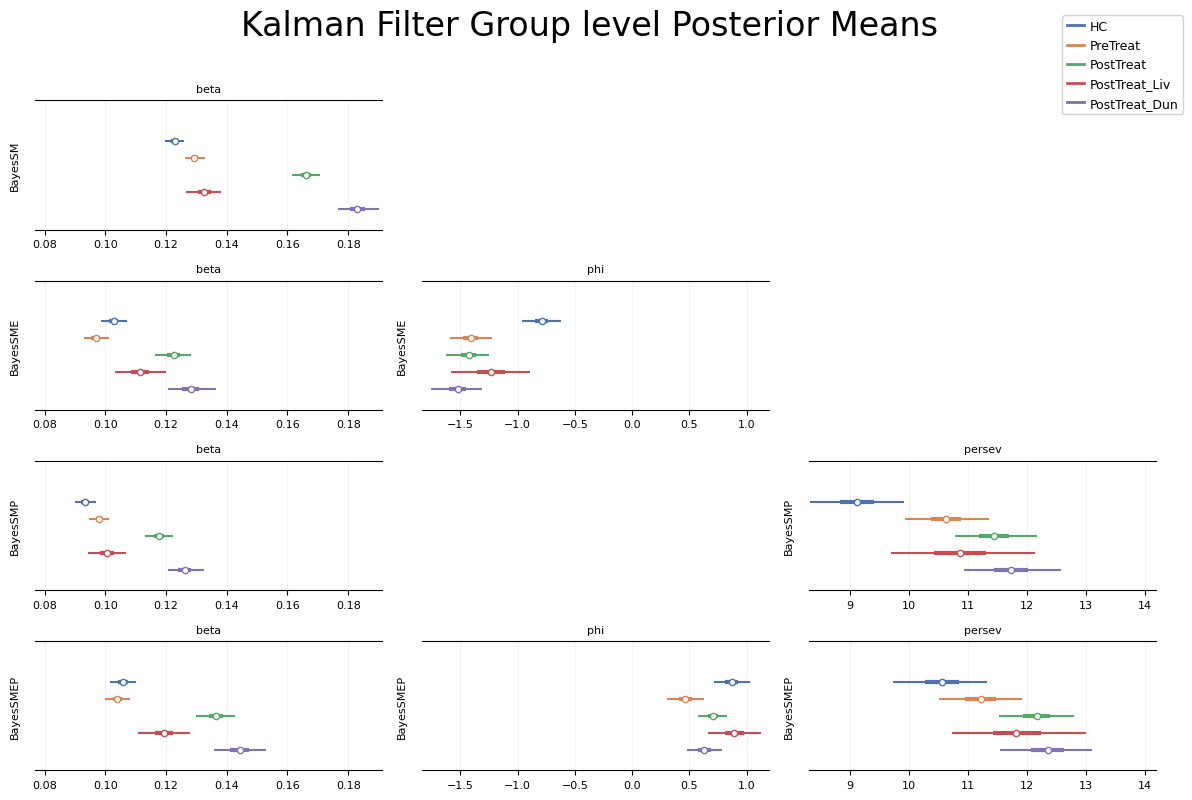

In [21]:

kf_param_list = param_list = ["beta","phi","persev"]
kf_model_names =['BayesSM', 'BayesSME', 'BayesSMP', 'BayesSMEP']
n_rows, n_cols = len(kf_model_names), len(kf_param_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), squeeze=False)

for i, model in enumerate(kf_model_names):
   
    for j, param in enumerate(kf_param_list):
        ax = axes[i, j]
        
        if param not in idatas_groups['HC'][model].posterior.data_vars:
            ax.axis('off')
            continue

        group_mean_posteriors = [
            az.from_dict(
                posterior={
                    param: (
                        idatas_groups[group][model]
                        .posterior[param]
                        .mean(dim=[d for d in idatas_groups[group][model].posterior[param].dims if d not in ['chain','draw']])
                        .stack(sample=('chain','draw'))
                        .values[None, :]
                    )
                }
            )
            for group in groups
        ]

        az.plot_forest(
                group_mean_posteriors,
                var_names=[param],
                model_names=groups,
                colors=[palette[group] for group in groups],
                combined=True,
                ax=ax,
        )
        ax.set_title("")
        ax.grid(axis="x", alpha=0.15)
        ax.tick_params(labelsize=8)
        
        ax.set_yticklabels([])
        ax.set_title(param, fontsize=8)
        ax.set_ylabel(model, fontsize=8)
        if param in parameter_axis_limits:
            ax.set_xlim(*parameter_axis_limits[param])
        
plt.tight_layout(rect=(0.0, 0.08, 1.0, 1.0))

from matplotlib.lines import Line2D

for ax in axes.ravel():
    lg = ax.get_legend()
    if lg is not None:
        lg.remove()

# figure-level legend (top-right of the whole figure)
handles = [Line2D([0],[0], lw=2, color=palette[g]) for g in groups]
labels  = groups
fig.legend(
    handles, labels,
    loc='upper right', bbox_to_anchor=(0.995, 0.995),
    frameon=True, framealpha=0.9,
    borderpad=0.35, handlelength=1.4, handletextpad=0.45,
    prop={'size': 9}, ncol=1
)
fig.suptitle("Kalman Filter Group level Posterior Means ", y=0.995, fontsize=24)
plt.tight_layout(rect=(0.0, 0.0, 0.98, 0.98))


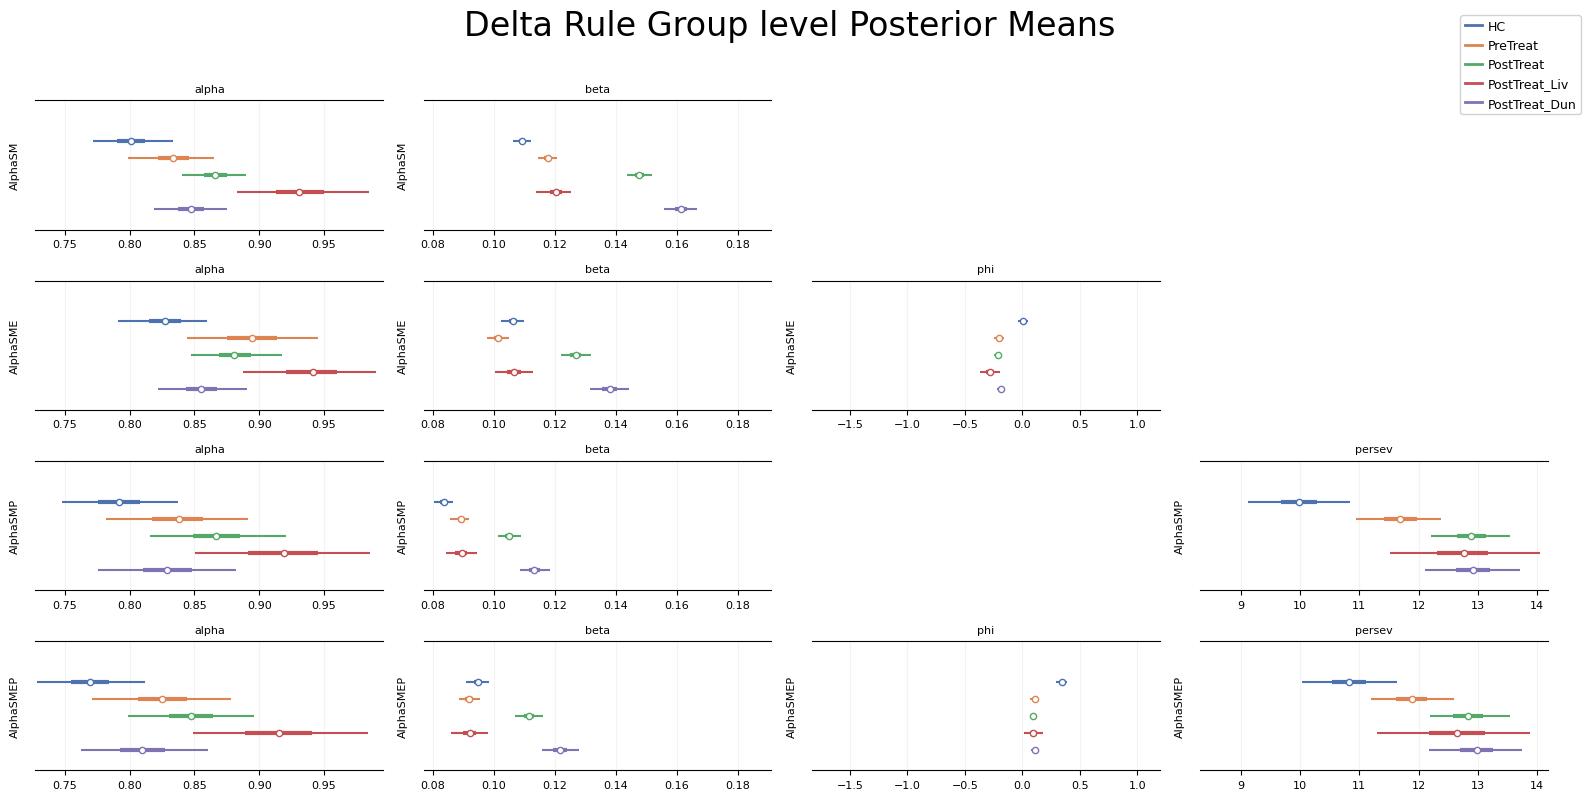

In [ ]:

alphas_model_names = ['AlphaSM', 'AlphaSME', 'AlphaSMP', 'AlphaSMEP']
n_rows, n_cols = len(alphas_model_names), len(param_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), squeeze=False)

for i, model in enumerate(alphas_model_names):
    
    for j, param in enumerate(param_list):
        ax = axes[i, j]
        
        if param not in idatas_groups['HC'][model].posterior.data_vars:
            ax.axis('off')
            continue

        group_mean_posteriors = [
            az.from_dict(
                posterior={
                    param: (
                        idatas_groups[group][model]
                        .posterior[param]
                        .mean(dim=[d for d in idatas_groups[group][model].posterior[param].dims if d not in ['chain','draw']])
                        .stack(sample=('chain','draw'))
                        .values[None, :]
                    )
                }
            )
            for group in groups
        ]

        az.plot_forest(
                group_mean_posteriors,
                var_names=[param],
                model_names=groups,
                colors=[palette[group] for group in groups],
                combined=True,
                ax=ax,
        )
        ax.set_title("")
        ax.grid(axis="x", alpha=0.15)
        ax.tick_params(labelsize=8)
        
        ax.set_yticklabels([])
        ax.set_title(param, fontsize=8)
        ax.set_ylabel(model, fontsize=8)
        if param in parameter_axis_limits:
            ax.set_xlim(*parameter_axis_limits[param])
        
plt.tight_layout(rect=(0.0, 0.08, 1.0, 1.0))

from matplotlib.lines import Line2D

for ax in axes.ravel():
    lg = ax.get_legend()
    if lg is not None:
        lg.remove()

# figure-level legend (top-right of the whole figure)
handles = [Line2D([0],[0], lw=2, color=palette[g]) for g in groups]
labels  = groups
fig.legend(
    handles, labels,
    loc='upper right', bbox_to_anchor=(0.995, 0.995),
    frameon=True, framealpha=0.9,
    borderpad=0.35, handlelength=1.4, handletextpad=0.45,
    prop={'size': 9}, ncol=1
)
fig.suptitle("Delta Rule Group level Posterior Means ", y=0.995, fontsize=24)
plt.tight_layout(rect=(0.0, 0.0, 0.98, 0.98))
